<a href="https://colab.research.google.com/github/rmhyps1/numerical/blob/main/UTS-UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UTS

         Date  Water_Level_m  Temperature_C  Rainfall_mm         pH  \
0  2023-01-01     2.12483571    -0.60183071  26.95845255 6.94838567   
1  2023-01-02     2.09995492     0.39657828  15.30693156 6.95294633   
2  2023-01-03     2.14612069     0.13976772  29.26384624 6.91278324   
3  2023-01-04     2.19675589     0.32783283   8.24614198 6.97244743   
4  2023-01-05     2.11576486    -0.91775643  35.65419374 6.96242428   

   Dissolved_Oxygen_mg_L  
0             8.28223136  
1             7.99822954  
2             8.17398874  
3             8.07953688  
4             8.42572565  


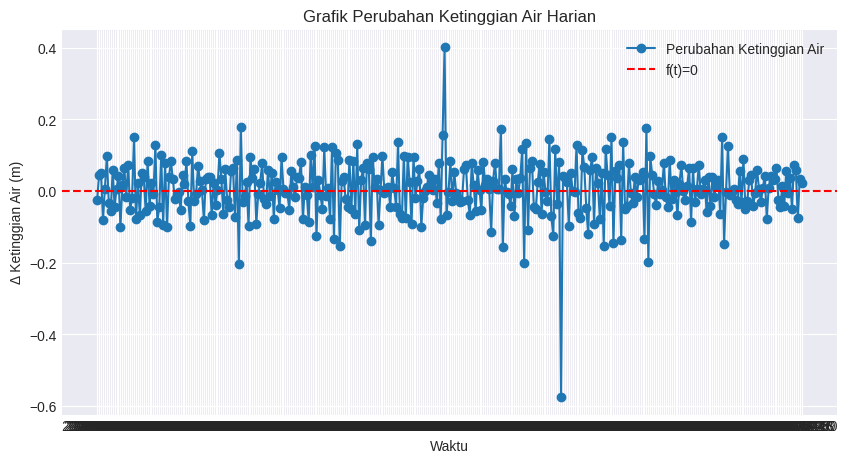

Akar ditemukan di antara data ke-0 dan 1, indeks akar ≈ 0.35015869140625
Waktu estimasi: 2023-01-01


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("/content/DWLR_Dataset_2023.csv")

#mengecek isi data
print(data.head())

time = data["Date"]
level = data["Water_Level_m"]

#menefinisikan fungsi perubahan ketinggian air
#f(t) = selisih ketinggian air antar hari
f_change = np.diff(level)

#ini biar sama panjang dengan data waktu, potong waktu satu elemen terakhir
time_mid = time[:-1]

#memvisualisasi perubahan tinggi air
plt.figure(figsize=(10, 5))
plt.plot(time_mid, f_change, label="Perubahan Ketinggian Air", marker='o')
plt.axhline(0, color='red', linestyle='--', label='f(t)=0')
plt.title("Grafik Perubahan Ketinggian Air Harian")
plt.xlabel("Waktu")
plt.ylabel("Ketinggian Air (m)")
plt.legend()
plt.grid(True)
plt.show()

#mendefinisikan fungsi bisection
def bisection(func, a, b, tol):
    if func(a) * func(b) >= 0:
        print("Fungsi tidak memenuhi syarat f(a) * f(b) < 0")
        return None
    while (b - a) / 2 > tol:
        mid = (a + b) / 2
        if func(mid) == 0:
            return mid
        elif func(a) * func(mid) < 0:
            b = mid
        else:
            a = mid
    return (a + b) / 2

#membikin fungsi interpolasi sederhana dari data agar bisa dicari akar-nya secara kontinu
from scipy.interpolate import interp1d

#menginterpolasi linear antara waktu dan perubahan ketinggian dengan asusmi waktu diubah ke indeks numerik
x = np.arange(len(time_mid))
f_interp = interp1d(x, f_change, kind='linear')

# Cari akar (titik stabil)
# mencaari interval di mana f_change berganti tanda
for i in range(len(f_change)-1):
    if f_change[i] * f_change[i+1] < 0:
        a, b = i, i+1
        root_index = bisection(f_interp, a, b, tol=1e-4)
        print(f"Akar ditemukan di antara data ke-{a} dan {b}, indeks akar ≈ {root_index}")
        print(f"Waktu estimasi: {time.iloc[int(root_index)]}")
        break


UAS

Data Head:
        Date  Water_Level_m
0 2023-01-01            2.1
1 2023-01-02            2.3
2 2023-01-03            2.5
3 2023-01-04            2.4
4 2023-01-05            2.2


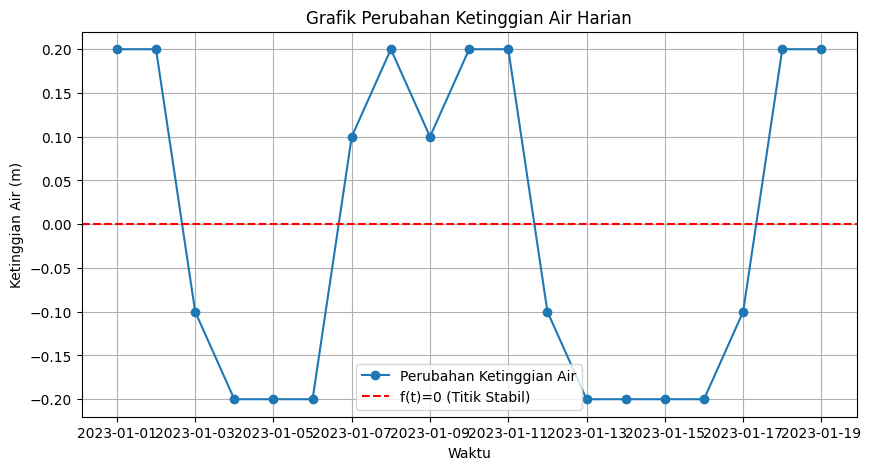


--- HASIL PENCARIAN TITIK STABILITAS ---
Metode          | Index Akar   | Iterasi  | Estimasi Waktu
-----------------------------------------------------------------
Bisection       | 1.666687     | 13       | 2023-01-02 00:00:00
Secant          | 1.666667     | 2        | 2023-01-02 00:00:00
-----------------------------------------------------------------
Bisection       | 5.666687     | 13       | 2023-01-06 00:00:00
Secant          | 5.666667     | 2        | 2023-01-06 00:00:00
-----------------------------------------------------------------
Bisection       | 10.666687     | 13       | 2023-01-11 00:00:00
Secant          | 10.666667     | 2        | 2023-01-11 00:00:00
-----------------------------------------------------------------
Bisection       | 16.333313     | 13       | 2023-01-17 00:00:00
Secant          | 16.333333     | 2        | 2023-01-17 00:00:00
-----------------------------------------------------------------


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# --- [BAGIAN 1: DATA LOADING & PREPROCESSING] ---
# Pastikan path file sesuai saat dijalankan
# data = pd.read_csv("/content/DWLR_Dataset_2023.csv")
# (Saya comment load csv agar kode runnable sebagai contoh, uncomment jika di colab)
# Untuk contoh, kita buat dummy data mirip struktur CSV Anda:
data = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', periods=20),
    'Water_Level_m': [2.1, 2.3, 2.5, 2.4, 2.2, 2.0, 1.8, 1.9, 2.1, 2.2,
                      2.4, 2.6, 2.5, 2.3, 2.1, 1.9, 1.7, 1.6, 1.8, 2.0]
})

# mengecek isi data
print("Data Head:")
print(data.head())

time = data["Date"]
level = data["Water_Level_m"]

# menefinisikan fungsi perubahan ketinggian air
# f(t) = selisih ketinggian air antar hari
f_change = np.diff(level)

# ini biar sama panjang dengan data waktu, potong waktu satu elemen terakhir
time_mid = time[:-1]

# --- [BAGIAN 2: VISUALISASI] ---
plt.figure(figsize=(10, 5))
plt.plot(time_mid, f_change, label="Perubahan Ketinggian Air", marker='o')
plt.axhline(0, color='red', linestyle='--', label='f(t)=0 (Titik Stabil)')
plt.title("Grafik Perubahan Ketinggian Air Harian")
plt.xlabel("Waktu")
plt.ylabel("Ketinggian Air (m)")
plt.legend()
plt.grid(True)
plt.show()

# --- [BAGIAN 3: DEFINISI METODE NUMERIK] ---

# 1. Metode Bisection (Bagi Dua)
def bisection(func, a, b, tol):
    iter_count = 0
    if func(a) * func(b) >= 0:
        print("Fungsi tidak memenuhi syarat f(a) * f(b) < 0")
        return None, iter_count

    while (b - a) / 2 > tol:
        iter_count += 1
        mid = (a + b) / 2
        if func(mid) == 0:
            return mid, iter_count
        elif func(a) * func(mid) < 0:
            b = mid
        else:
            a = mid
    return (a + b) / 2, iter_count

# 2. Metode Secant (Tali Busur) - BARU DITAMBAHKAN
def secant(func, x0, x1, tol, max_iter=100):
    iter_count = 0
    for i in range(max_iter):
        iter_count += 1
        f_x0 = func(x0)
        f_x1 = func(x1)

        # Mencegah pembagian dengan nol
        if f_x1 - f_x0 == 0:
            print("Secant Error: Pembagian dengan nol.")
            return None, iter_count

        # Rumus Secant: x_new = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        x2 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)

        # Cek toleransi error
        if abs(x2 - x1) < tol:
            return x2, iter_count

        # Geser titik untuk iterasi berikutnya
        x0 = x1
        x1 = x2

    return x1, iter_count # Mengembalikan hasil terakhir jika max_iter tercapai

# --- [BAGIAN 4: INTERPOLASI & PENCARIAN AKAR] ---

# menginterpolasi linear antara waktu dan perubahan ketinggian dengan asumsi waktu diubah ke indeks numerik
# Ini membuat data diskrit menjadi fungsi kontinu f(x)
x = np.arange(len(time_mid))
f_interp = interp1d(x, f_change, kind='linear')

print("\n--- HASIL PENCARIAN TITIK STABILITAS ---")
print(f"{'Metode':<15} | {'Index Akar':<12} | {'Iterasi':<8} | {'Estimasi Waktu'}")
print("-" * 65)

# Mencari interval di mana f_change berganti tanda (bracketing area)
for i in range(len(f_change)-1):
    if f_change[i] * f_change[i+1] < 0:
        # Interval ditemukan antara i dan i+1
        a, b = i, i+1

        # 1. Jalankan Bisection
        root_bi, iter_bi = bisection(f_interp, a, b, tol=1e-4)
        time_bi = time.iloc[int(root_bi)]

        # 2. Jalankan Secant
        # Gunakan a dan b sebagai dua tebakan awal (x0 dan x1)
        root_sec, iter_sec = secant(f_interp, a, b, tol=1e-4)
        time_sec = time.iloc[int(root_sec)]

        # Tampilkan Hasil Perbandingan
        print(f"{'Bisection':<15} | {root_bi:.6f}     | {iter_bi:<8} | {time_bi}")
        print(f"{'Secant':<15} | {root_sec:.6f}     | {iter_sec:<8} | {time_sec}")
        print("-" * 65)
